### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

### READING & EXPLORING DATA

In [2]:
dfTR = pd.read_csv('./train.csv')
dfTR.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dfTR.Embarked.unique()


array(['S', 'C', 'Q', nan], dtype=object)

In [4]:
dfTR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dfTR.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### To find out NULL values, we are using heatmap which tells us that Age and Cabin column has NULL values

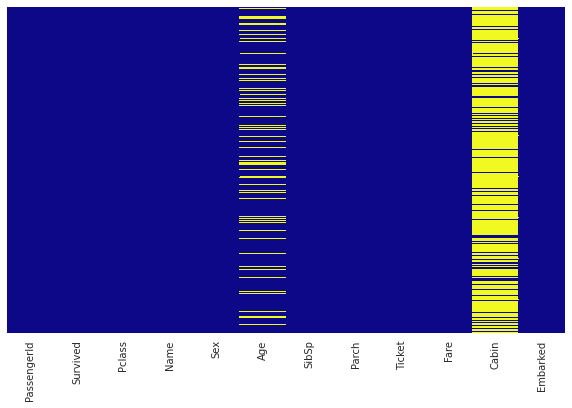

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(dfTR.isnull(),cbar=False,yticklabels=False,cmap='plasma')
plt.show()

##  

### DATA VISUALISATION & EXPLORATORY ANALYSIS

#### From COUNT PLOT , we understand that number of deads were more than number of survivors

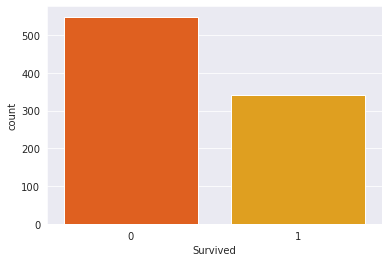

In [7]:
sns.countplot(data = dfTR, x='Survived',palette='autumn')
plt.show()

#### From COUNT PLOT with separation of SEX, we visualising that number of deads mainly comprise of MALE passengers

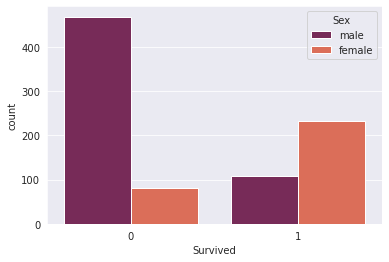

In [9]:
sns.countplot(data=dfTR, x='Survived',palette='rocket',hue='Sex')
plt.show()

#### From COUNTPLOT with Passenger Class separation, we realise that number of deads are higher from 3rd class passengers and most of these passengers are male travellers

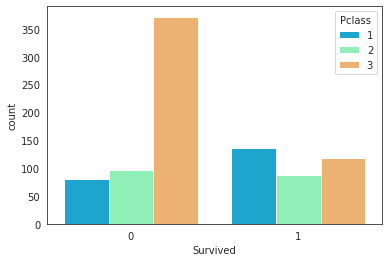

In [12]:
sns.set_style('white')
sns.countplot(data=dfTR, x='Survived',palette='rainbow',hue='Pclass')
plt.show()

   #### Age of the passengers from given data is mainly distributed in the range of 20-35 years old.

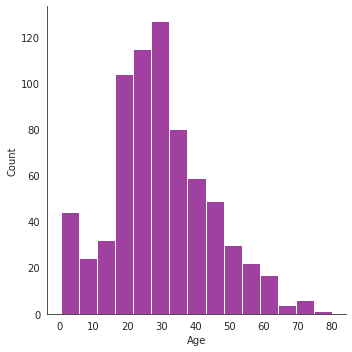

In [17]:
sns.displot(data=dfTR, x='Age',color='purple',kde=False,bins=15)
plt.show()

#### COUNT PLOT of Siblings and Spouse tells us that majority of passengers were solo travellers followed by travellers with their spouse

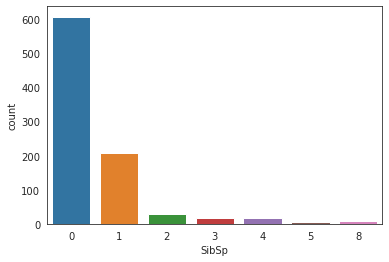

In [18]:
sns.countplot(data=dfTR, x='SibSp')
plt.show()

#### Distribution of Fares

<AxesSubplot:>

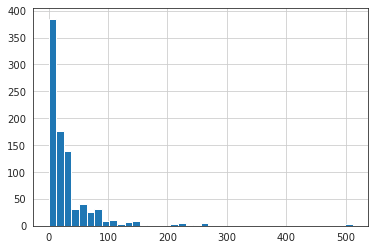

In [20]:
dfTR.Fare.hist(bins=40)

#### From below BOX PLOT we realise that the selection of PClass is very much correlated to Age which is obvious as with increasing Age, the income capacity increases so the expenditure capacity. 

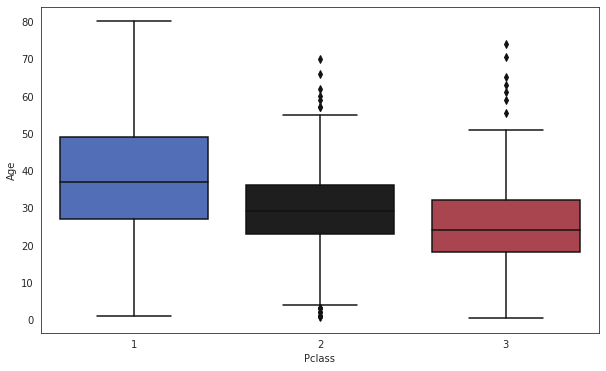

In [21]:
plt.figure(figsize=(10,6))

sns.boxplot(y='Age',x='Pclass',data=dfTR,palette='icefire')

plt.show()

### DATA CLEANING

In [24]:
def impute(x):
    Age = x[0]
    
    Pclass = x[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 35
        elif Pclass == 2:
            return 28
        elif Pclass == 3:
            return 25
    else:
        return Age    

In [25]:
dfTR['Age'] = dfTR[['Age','Pclass']].apply(impute,axis=1)

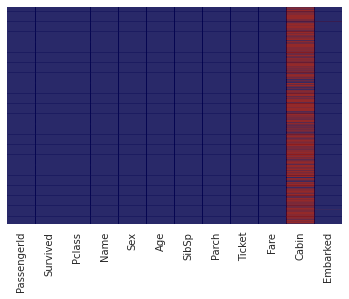

In [26]:
sns.heatmap(dfTR.isnull(), cbar=False, yticklabels = False, cmap='seismic',alpha=0.3)
plt.show()

In [27]:
dfTR.drop('Cabin',inplace = True,axis=1)

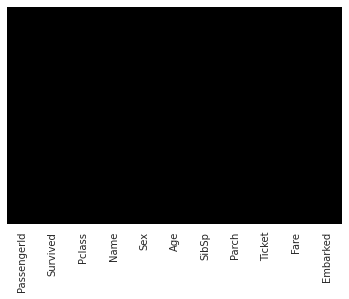

In [28]:
sns.heatmap(dfTR.isnull(), cbar=False, yticklabels = False, cmap='copper')
plt.show()

### CONVERTING CATEGORICAL VARIABLES

In [29]:
sex = pd.get_dummies(dfTR['Sex'], prefix='Sex', drop_first=True)
sex

,Sex_male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [30]:
embarked = pd.get_dummies(dfTR['Embarked'], prefix='Emb', drop_first=True)
embarked

,Emb_Q,Emb_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [31]:
dfTR=pd.concat([dfTR,sex,embarked],axis=1)
dfTR.drop(['Sex','Embarked','Ticket','Name','PassengerId'],axis=1,inplace=True)
dfTR.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Emb_Q,Emb_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### PREDICTIONS

### SCALING THE DATASET

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [35]:
XTr = np.array(dfTR[dfTR.columns[1:]])
XTr.shape

(891, 8)

In [50]:
YTr = np.array(dfTR[dfTR.columns[0:1]]).reshape(dfTR.shape[0])
YTr.shape

(891,)

In [51]:
scaler.fit(XTr)
XTrNorm = scaler.transform(XTr)

### TRAIN - TEST - SPLIT

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(XTrNorm, YTr, test_size=0.3, random_state=101)

### 1. Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

mdl = LogisticRegression()

In [54]:
mdl.fit(X_train,Y_train)

LogisticRegression()

In [55]:
pred = mdl.predict(X_test)
pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [56]:
Y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1])

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [58]:
print(accuracy_score(Y_test,pred))

0.7910447761194029


In [59]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.81      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



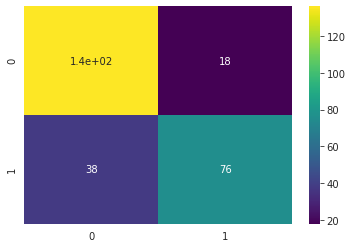

In [61]:
sns.heatmap(confusion_matrix(Y_test,pred), cmap='viridis',annot=True)
plt.show()

### 2. K-Nearest Neighbors

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn = KNeighborsClassifier(n_neighbors=1)

In [64]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [65]:
knnpredict = knn.predict(X_test)
knnpredict

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1])

In [66]:
print(accuracy_score(Y_test,knnpredict))

0.7798507462686567


In [67]:
print(classification_report(Y_test,knnpredict))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       154
           1       0.76      0.70      0.73       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



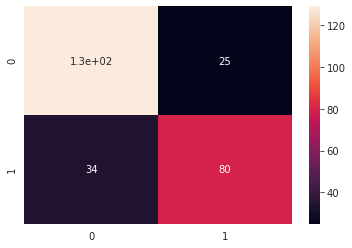

In [68]:
sns.heatmap(confusion_matrix(Y_test,knnpredict),annot=True)
plt.show()

### 3 - Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dtree = DecisionTreeClassifier()

In [71]:
dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [72]:
treepredict = dtree.predict(X_test)
treepredict

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1])

In [73]:
print(accuracy_score(Y_test,treepredict))

0.7723880597014925


In [74]:
print(classification_report(Y_test,treepredict))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       154
           1       0.79      0.63      0.70       114

    accuracy                           0.77       268
   macro avg       0.78      0.75      0.76       268
weighted avg       0.77      0.77      0.77       268



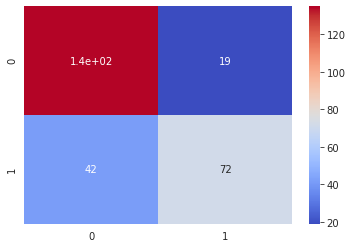

In [75]:
sns.heatmap(confusion_matrix(Y_test,treepredict),cmap='coolwarm',annot=True)
plt.show()

### 4 - Random Forest

### <center> 4.1 Random Forest with 10 estimators

In [76]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 10)
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10)

In [77]:
rfcpredict_10 = rfc.predict(X_test)
rfcpredict_10

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1])

In [78]:
print(accuracy_score(Y_test,rfcpredict_10))

0.7910447761194029


In [79]:
print(classification_report(Y_test,rfcpredict_10))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.81      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



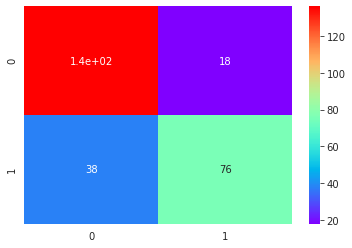

In [80]:
sns.heatmap(confusion_matrix(Y_test,rfcpredict_10),cmap='rainbow',annot=True)
plt.show()

### <center> 4.2 Random Forest with 100 estimators

In [81]:
rfc_100 = RandomForestClassifier(n_estimators=100)
rfc_100.fit(X_train,Y_train)

RandomForestClassifier()

In [82]:
rfcpredict_100 = rfc_100.predict(X_test)
rfcpredict_100

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1])

In [83]:
print(accuracy_score(Y_test,rfcpredict_100))

0.8022388059701493


In [84]:
print(classification_report(Y_test,rfcpredict_100))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       154
           1       0.80      0.72      0.76       114

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



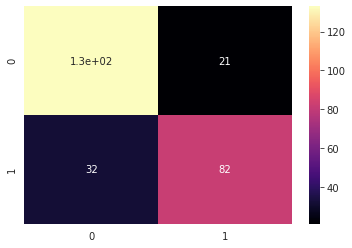

In [85]:
sns.heatmap(confusion_matrix(Y_test,rfcpredict_100),annot= True, cmap='magma')
plt.show()

### 5 - Support Vector Machines

In [86]:
from sklearn.svm import SVC

In [87]:
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

In [88]:
svc_predict = svc.predict(X_test)
svc_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1])

In [89]:
print(accuracy_score(Y_test,svc_predict))

0.8022388059701493


In [90]:
print(classification_report(Y_test,svc_predict))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       154
           1       0.87      0.63      0.73       114

    accuracy                           0.80       268
   macro avg       0.82      0.78      0.79       268
weighted avg       0.81      0.80      0.80       268



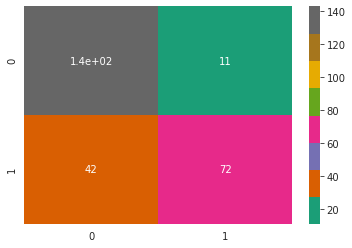

In [91]:
sns.heatmap(confusion_matrix(Y_test,svc_predict),cmap='Dark2',annot=True)
plt.show()